# MNIST dataset visualisation

Dataset versions, in increasing difficulty:

0. `onehot-bags` (not in PDF file, but self-explanatory)
1. `mnist-bags`
2. `multi-mnist-bags`
3. `mnist-collage`
4. `mnist-patch-collage`

In [2]:
import torch
import itertools

from mil.data.mnist import MNISTBags, OneHotMNISTBags, MNISTCollage
from mil.utils.visualize import plot_bag, print_one_hot_bag

## 0. `onehot-bags`

This dataset is a simplified version of `mnist-bags` (or `multi-mnist-bags`), where the instances are one-hot encoded 10-dimensional vectors representing the digits as opposed to the actual MNIST pictures.

In [3]:
ds = OneHotMNISTBags(target_numbers = 9, # target number
                     min_instances_per_target = 1, # 1 instance of a "9" suffices to label a bag as positive
                     num_digits = 10, # sample from all 10 MNIST digits
                     mean_bag_size = 10, # mean bag length
                     var_bag_size = 2, # variance of bag length
                     num_bags = 250, # number of bags
                     seed = 1,
                     train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn = lambda x: x[0])

for bag in itertools.islice(loader, 10):
    print_one_hot_bag(bag)

-  bag: {8 3 1 8 2 5 0 6}
+  bag: {9 9 3 7 4 3 4 4}
-  bag: {0 4 3 7 8 5 2 5 1}
-  bag: {1 3 3 0 0 0 4}
-  bag: {6 6 2 8 7 3 5 2}
-  bag: {3 2 3 7 2 7 1 6 3}
-  bag: {2 6 3 6 1 5 7}
+  bag: {3 0 4 6 4 9 3 0}
+  bag: {0 2 1 4 9 4 6 9}
-  bag: {3 2 2 4 3 6 8 4 2 0 6 5}


# 1. `mnist-bags`

In [4]:
ds = MNISTBags(target_numbers = 9, # target number
               min_instances_per_target = 1, # 1 instance of a "9" suffices to label a bag as positive
               num_digits = 10, # sample from all 10 MNIST digits
               mean_bag_size = 10, # mean bag length
               var_bag_size = 2, # variance of bag length
               num_bags = 250, # number of bags
               seed = 1,
               train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])
it = iter(loader)

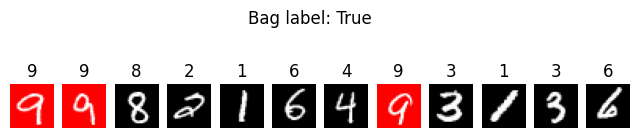

In [5]:
# Visualise a single bag (rerun this cell to see another bag)
plot_bag(next(it))

# 2. `multi-mnist-bags`

This is the same as `mnist-bags` but we set `target_number = (7, 9)` (a tuple instead of just an int).

In [6]:
ds = MNISTBags(target_numbers = (7, 9), # target number
               min_instances_per_target = 1, # 1 instance of a "9" suffices to label a bag as positive
               num_digits = 10, # sample from all 10 MNIST digits
               mean_bag_size = 10, # mean bag length
               var_bag_size = 2, # variance of bag length
               num_bags = 250, # number of bags
               seed = 1,
               train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])
it = iter(loader)

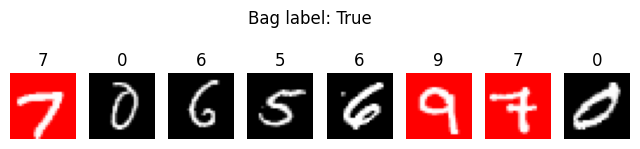

In [7]:
# Visualise a single bag (rerun this cell to see another bag)
plot_bag(next(it))

# 3. `mnist-collage`

This dataset is initialized with using the `MNISTCollage` class which takes similar arguments as `MNISTBags`, except for:
- `min_instances_per_target` is not an argument
- `collage_size` and `min_dist` are new arguments to control collage creation

In [9]:
ds = MNISTCollage(target_numbers = (7, 9), # target number
                  num_digits = 10, # sample from all 10 MNIST digits
                  mean_bag_size = 10, # mean bag length
                  var_bag_size = 2, # variance of bag length
                  num_bags = 250, 
                  collage_size=256, # size of the collage
                  min_dist=20, # minimum distance between instances of target numbers to be considered a positive bag
                  seed = 1,
                  train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])
it = iter(loader)

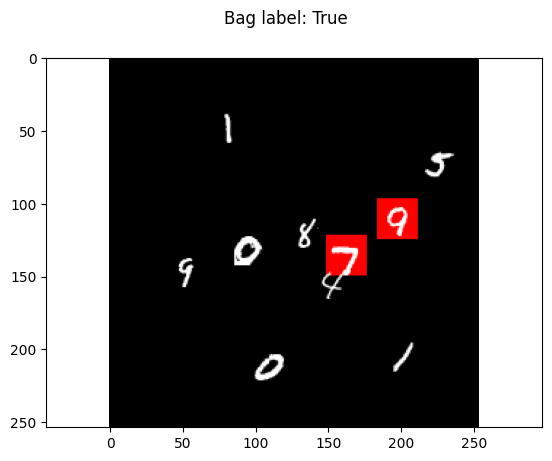

In [10]:
# Visualise a single bag (rerun this cell to see another bag)
plot_bag(next(it))